In [12]:
# LOAD THE PACKAGES:
library(deSolve)
library(reshape2)
library(ggplot2)

# MODEL INPUTS:

# Vector storing the initial number of people in each compartment
# (at timestep 0)
initial_state_values <- c(S = 59000000 - (2028 * 10) - 2028,  # the whole population we're modelling
                                       # is susceptible to infection
                          E = 2028 * 10,
                          I = 2028,       # the epidemic starts with 2028 infected person
                          R = 0 )       # there is no prior immunity in the
                                       # population also 25 is the people that died at time t

# Vector storing the parameters describing the transition rates in
# units of days^-1
parameters <- c(beta = 1.30,      # the infection rate
                gamma = 1/2.27,
                sigma = 1/3.21
                )   # the rate of recovery, which acts on 
                               # those infected

# TIMESTEPS:

# Vector storing the sequence of timesteps to solve the model at
times <- seq(from = 0, to = 100, by = 1)   
# from 0 to 37 days in daily intervals

# SIR MODEL FUNCTION: 

# The model function takes as input arguments (in the following order):
# time, state and parameters
sir_model <- function(time, state, parameters) {  

    with(as.list(c(state, parameters)), {  # tell R to unpack variable names 
                                           # from the state and parameters inputs    
        
    # New: calculating the total population size N        
      N <- S+E+I+R # (the sum of the number of people in each compartment)
      
    # New: defining lambda as a function of beta and I:
      lambda <- beta * S * I/N
    # Another option is simply replacing lambda with this
    # expression in the differential equations below
        
    # The differential equations
      dS <- -(1-0) * lambda           # people move out of (-) the S 
                                      # compartment at a rate lambda
                                      # (force of infection)
      dE = (1-0) * lambda - sigma * E
      dI <- sigma * E - gamma * I    # people move into (+) the I compartment
                                      # from S at a rate lambda, 
                                      # and move out of (-) the I compartment
                                      # at a rate gamma (recovery)
      dR <- gamma * I                 # people move into (+) the R compartment
                                      # from I at a rate gamma
      
    # Return the number of people in the S, I and R compartments at each
    # timestep (in the same order as the input state variables)
    return(list(c(dS, dE, dI, dR))) 
    })
  
}

# MODEL OUTPUT (solving the differential equations):

# Solving the differential equations using the ode integration algorithm
output <- as.data.frame(ode(y = initial_state_values, 
                            times = times, 
                            func = sir_model,
                            parms = parameters))
output


time,S,E,I,R
0,58977692,20280.00,2028.000,0.000
1,58972113,19765.33,6230.341,1891.359
2,58961923,23321.64,9409.050,5346.366
3,58947603,29478.36,12715.815,10202.584
4,58928590,38040.40,16717.530,16652.467
5,58903719,49374.88,21813.983,25092.410
6,58871325,64182.04,28402.278,36090.530
7,58829193,83449.55,36953.249,50404.052
8,58774433,108483.25,48060.721,69023.091
9,58703301,140977.73,62486.693,93234.625


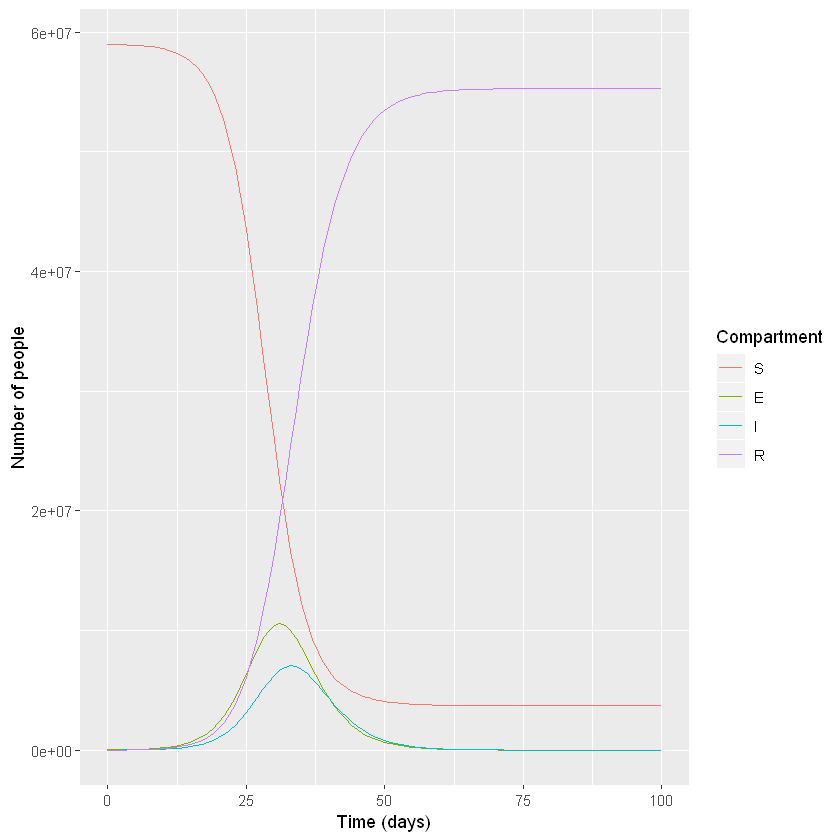

In [13]:
# Plotting the output
output_long <- melt(as.data.frame(output), id = "time")                  # turn output dataset into long format

ggplot(data = output_long,                                               # specify object containing data to plot
       aes(x = time, y = value, colour = variable, group = variable)) +  # assign columns to axes and groups
  geom_line() +                                                          # represent data as lines
  xlab("Time (days)")+                                                   # add label for x axis
  ylab("Number of people") +                                             # add label for y axis
  labs(colour = "Compartment") 